**(1 балл) Для чего нужно понятие стационарности в анализе временных рядов?
Перечислите все случаи и распишите свой ответ.**

Понятие стационарности используется для рядов, свойства которых не зависят от времени (дисперсия и среднее значение
не меняется во времени). 
В таких рядах не видно тренда или изменяемой во времени дисперсии. Примером является белый шум:

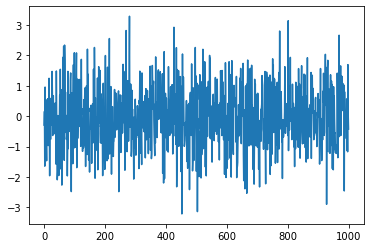

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

white_noise = np.random.randn(1000)
plt.plot(range(len(white_noise)), white_noise);

Примером белого шума является шум близкого водопада.

Прогнозируемость стационарного временного ряда определяется с помощью автокорреляции.

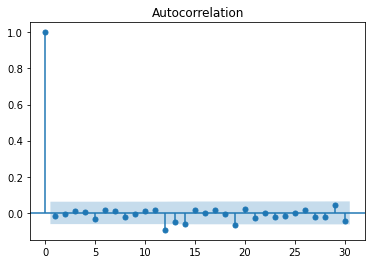

In [2]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(np.array(white_noise));

Мы видим, что все корреляции выстроены около нуля, значит никаких закономерностей у белого шума нет.

Другой пример стационарных временных рядов — рождаемость в России. Конечно, она зависит от множества факторов, но ее спад или рост возможно предсказать: у рождаемости нет ярко выраженной сезонности.
В нестационарных временных рядах статистические свойства меняются со временем. Они показывают сезонные эффекты, тренды и другие структуры, которые зависят от временного показателя. Пример — международные перелеты авиакомпаний. Количество пассажиров на тех или иных направлениях меняется в зависимости от сезонности.    

#### (1 балла) Рассмотрите картинку data/images/ts_types.png.
* a. Назовите ряды с гетероскедастичностью. Ответ: i
* b. Какие ряды имеют сезонность? Ответ: d,h,i
* с. Какие ряды имеют цикличность? Ответ: d
* d. Какие ряды можно приблизить моделью интегрированного ряда? Ответ: Ряд a можно восстановить из ряда b.
* e. Какие ряды можно считать стационарными? Ответ: b,g

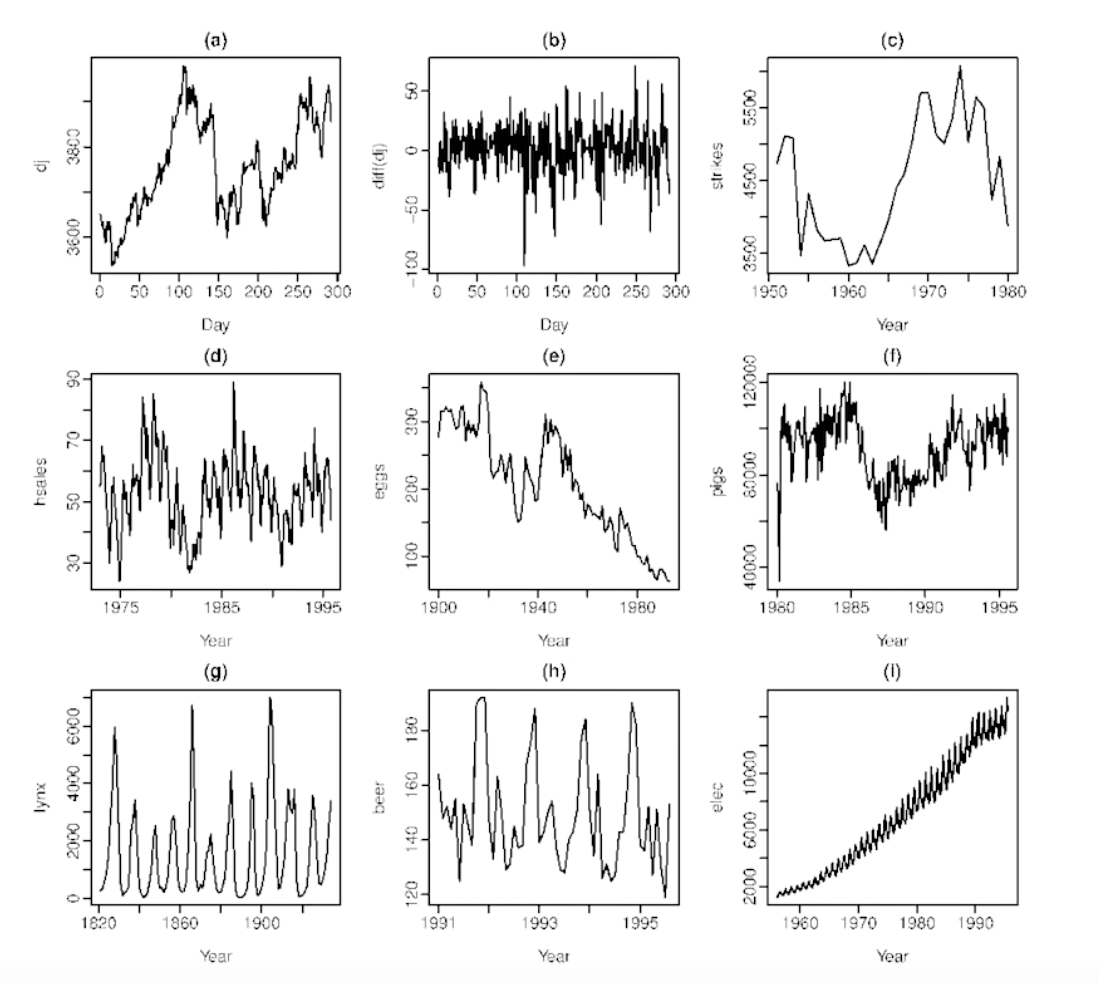

In [3]:
from PIL import Image
Image.open('data/images/ts_types.png')

**(2 балла) Рассмотрите один из графиков индекса Доу-Джонса (data/dataset/
dow_jones.csv). Предположим, вы можете сделать только одно
преобразование ряда, чтобы сделать его стационарным. Какое
преобразование вы выберете и почему? Сделайте это преобразование,
проверьте, получили ли вы белый шум.**

<AxesSubplot:>

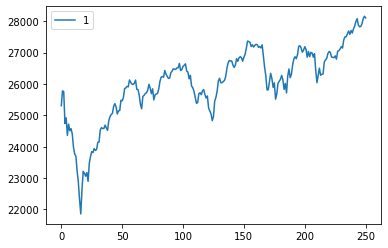

In [4]:
import pandas as pd

dj = pd.read_csv('data/dataset/dow_jones_0.csv',header=None)
dj.plot()

<AxesSubplot:>

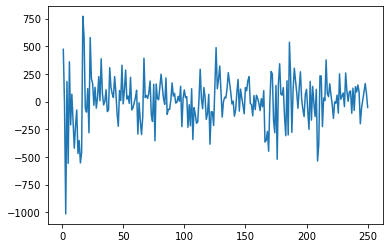

In [5]:
dj[1].diff().plot()

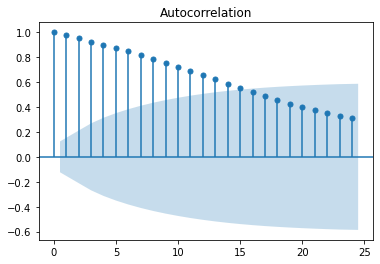

In [34]:
plot_acf(dj[1].dropna());

Полученный ряд говорит нам о том, что есть устойчивый тренд, а сезонности нет.

**(2 балла) Рассмотрите ряд data/dataset/stl_example.csv. Постройте для него
график автокорреляций. Обьясните закономерности, которые вы видите.**

<AxesSubplot:>

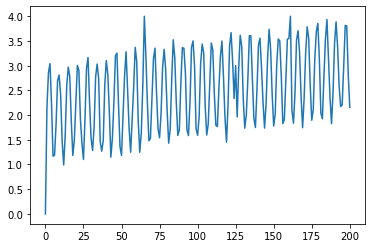

In [7]:
stl = pd.read_csv('data/dataset/stl_example.csv',header=None)
stl[1].plot()

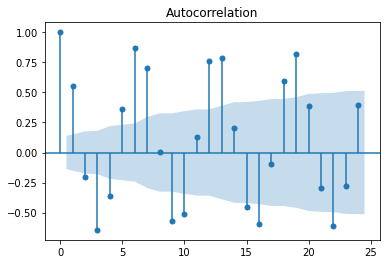

In [35]:
plot_acf(stl[1].dropna());

По коррелограмме видно, что наш временной ряд обладает сезонностью с периодом 6.
Значения на полученном графике получаются путём свдига временного ряда и вычислением корреляций Пирсона между оригинальным временным рядом и сдвигающимся.
Значение в точке 0 - 100% корреляция, так ещё график не был сдвинут, а следующие получены для лагов в один шаг.

**(4 балла) На семинаре, посвященном stl разложению мы находили период
сезонности сезонных временных рядов при помощи графика автокорреляций.
Однако, если бы мы захотели построить автоматическую систему определения
периода, мы бы уже не могли “вручную” анализировать каждый график. Таким
образом вам необходимо написать функцию get_seasonal_period(), которая бы
автоматически определяла период сезонных временных рядов, использую
автокорреляционную функцию.**

In [32]:
def get_seasonal_period(series):
    
    #вычисляем автокорреляцию:
    x = np.asarray(series)
    y = x-x.mean()
    result = np.correlate(y, y, mode='full')
    result = result[len(result)//2:]
    result /= result[0]
    result = pd.Series(result)
    r = result - result.std() 
    
    #второй вариант без расчёта автокорреляции: r = (series.diff().dropna() - series.diff().dropna().std())
    
    periods = 0
    for i in range(len(r)-1):
        if (r.values[i] >= 0 and r.values[i+1] >= 0) or (r.values[i] <= 0 and r.values[i+1] <= 0):
            pass
        else:
            periods +=1
    return int(len(r)/(periods))

In [33]:
get_seasonal_period(stl[1])

6